# Transfer Learning

## Import Packages

In [1]:
!pip uninstall ml_project_util -y
!pip install git+https://github.com/aris-gk3/ml_project_util.git
# or for local development:
# %pip uninstall ml_project_util -y
# %pip install git+https://github.com/aris-gk3/ml_project_util.git

import tensorflow as tf # type: ignore
from tensorflow.keras import layers, models # type: ignore
from tensorflow.keras.applications import VGG16 # type: ignore
# My package imports
from ml_project_util.path import path_definition
from ml_project_util.train import train, freeze_layers, unfreeze_head
from ml_project_util.model_evaluation import model_evaluation_precise

  Cloning https://github.com/aris-gk3/ml_project_util.git to /tmp/pip-req-build-9h9016q6
  Running command git clone --filter=blob:none --quiet https://github.com/aris-gk3/ml_project_util.git /tmp/pip-req-build-9h9016q6
  Resolved https://github.com/aris-gk3/ml_project_util.git to commit d7efaad36089c8469c6c2e13af236643ac518494
  Preparing metadata (setup.py) ... done
  Created wheel for ml_project_util: filename=ml_project_util-0.1-py3-none-any.whl size=22709 sha256=af96756394591c720fc9accaf7edf1258676edccee08465425888cec5a0711e3
  Stored in directory: /tmp/pip-ephem-wheel-cache-nfxd06q3/wheels/9b/33/7a/e8e8f55a4c6aa39df26369c48b9e3497c6dde4c7663912f8ef
Successfully built ml_project_util


2025-06-15 12:29:22.175141: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749990562.318658      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749990562.360425      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## Define Variable Paths

In [2]:
dict = path_definition(ds_rel_path='uc-merced-21-restructured-and-converted') # path_definition.config to read
BASE_PATH = dict['BASE_PATH']
PATH_DATASET = dict['PATH_DATASET']
PATH_TEST = dict['PATH_TEST']
PATH_RAWDATA = dict['PATH_RAWDATA']
PATH_JOINEDDATA = dict['PATH_JOINEDDATA']
PATH_SAVEDMODELS = dict['PATH_SAVEDMODELS']

ds_rel_path set to: uc-merced-21-restructured-and-converted


## Define the Model

In [3]:
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model = models.Sequential()
for layer in vgg_base.layers:
    model.add(layer)
# Adding the new head
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(21, activation='softmax'))

I0000 00:00:1749990576.745656      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


## Train the Model

- block1_conv1 (Conv2D), Trainable: False
- block1_conv2 (Conv2D), Trainable: False
- block1_pool (MaxPooling2D), Trainable: False
- block2_conv1 (Conv2D), Trainable: False
- block2_conv2 (Conv2D), Trainable: False
- block2_pool (MaxPooling2D), Trainable: False
- block3_conv1 (Conv2D), Trainable: False
- block3_conv2 (Conv2D), Trainable: False
- block3_conv3 (Conv2D), Trainable: False
- block3_pool (MaxPooling2D), Trainable: False
- block4_conv1 (Conv2D), Trainable: False
- block4_conv2 (Conv2D), Trainable: False
- block4_conv3 (Conv2D), Trainable: False
- block4_pool (MaxPooling2D), Trainable: False
- block5_conv1 (Conv2D), Trainable: False
- block5_conv2 (Conv2D), Trainable: False
- block5_conv3 (Conv2D), Trainable: False
- block5_pool (MaxPooling2D), Trainable: False
- global_average_pooling2d (GlobalAveragePooling2D), Trainable: False
- dense (Dense), Trainable: False
- dropout (Dropout), Trainable: False
- dense_1 (Dense), Trainable: False


- block1_conv1 (Conv2D), Trainable: Fal

I0000 00:00:1749990586.626681      97 service.cc:148] XLA service 0x7cf10c00eba0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1749990586.627623      97 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1749990587.006078      97 cuda_dnn.cc:529] Loaded cuDNN version 90300


 2/42 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - accuracy: 0.0469 - loss: 7.9982 

I0000 00:00:1749990595.534095      97 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step - accuracy: 0.1779 - loss: 5.0917
Epoch 1: saving model to /kaggle/working/SavedModels/UC1/UC1_P1_001_val1.2056.keras
42/42 ━━━━━━━━━━━━━━━━━━━━ 39s 651ms/step - accuracy: 0.1807 - loss: 5.0546 - val_accuracy: 0.6310 - val_loss: 1.2056
Epoch 2/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 540ms/step - accuracy: 0.5441 - loss: 1.4536
Epoch 2: saving model to /kaggle/working/SavedModels/UC1/UC1_P1_002_val0.7283.keras
42/42 ━━━━━━━━━━━━━━━━━━━━ 24s 571ms/step - accuracy: 0.5451 - loss: 1.4506 - val_accuracy: 0.7798 - val_loss: 0.7283
Epoch 3/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 543ms/step - accuracy: 0.6577 - loss: 1.1251
Epoch 3: saving model to /kaggle/working/SavedModels/UC1/UC1_P1_003_val0.5403.keras
42/42 ━━━━━━━━━━━━━━━━━━━━ 24s 575ms/step - accuracy: 0.6580 - loss: 1.1235 - val_accuracy: 0.8304 - val_loss: 0.5403
Epoch 4/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 542ms/step - accuracy: 0.7152 - loss: 0.8389
Epoch 4: saving model to /kaggle/working/SavedModels/UC1/UC1_

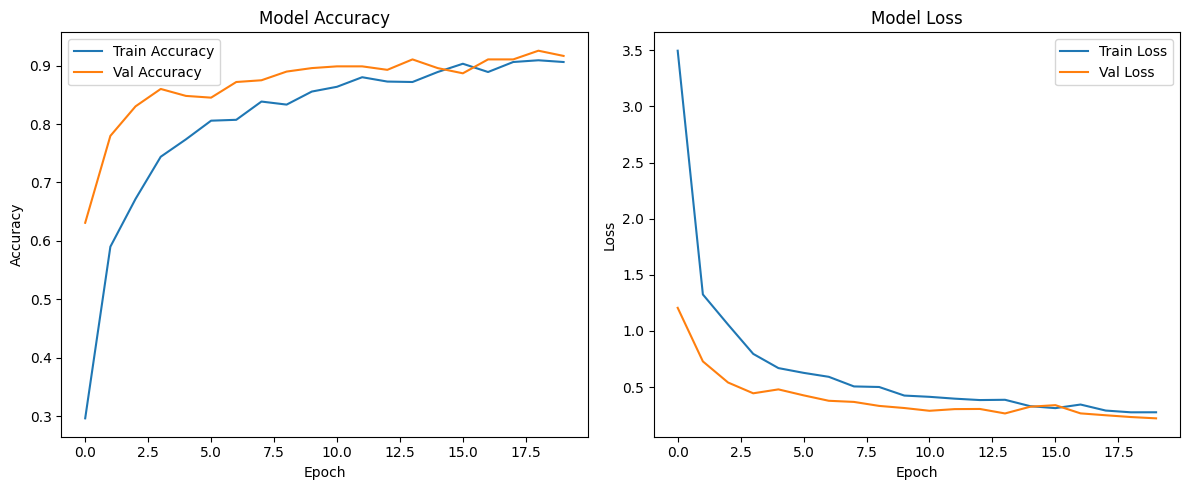

In [4]:
epochs = 20
lr = 1e-3
optimizer = 'Adam'
model_name = 'UC1_P1'

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.25),  # Larger rotation range is useful
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomTranslation(0.2, 0.2),
    tf.keras.layers.RandomContrast(0.2),  # Satellite images vary in lighting/contrast
])

freeze_layers(model, verbose=1)
unfreeze_head(model, verbose=1)
train(model, epochs, lr, optimizer, model_name, is_binary=0, plot=True, augmentation_pipeline=data_augmentation, early_stopping=False)

In [5]:
model_evaluation_precise(model)

Found 420 files belonging to 21 classes.
Start evaluating batches
Batch Number: 13
Precise test accuracy: 0.92143
Precise test loss: 0.19167


(0.92142856, 0.19166808245437486)

In [6]:
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model = models.Sequential()
for layer in vgg_base.layers:
    model.add(layer)
# Adding the new head
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(21, activation='softmax'))

- block1_conv1 (Conv2D), Trainable: False
- block1_conv2 (Conv2D), Trainable: False
- block1_pool (MaxPooling2D), Trainable: False
- block2_conv1 (Conv2D), Trainable: False
- block2_conv2 (Conv2D), Trainable: False
- block2_pool (MaxPooling2D), Trainable: False
- block3_conv1 (Conv2D), Trainable: False
- block3_conv2 (Conv2D), Trainable: False
- block3_conv3 (Conv2D), Trainable: False
- block3_pool (MaxPooling2D), Trainable: False
- block4_conv1 (Conv2D), Trainable: False
- block4_conv2 (Conv2D), Trainable: False
- block4_conv3 (Conv2D), Trainable: False
- block4_pool (MaxPooling2D), Trainable: False
- block5_conv1 (Conv2D), Trainable: False
- block5_conv2 (Conv2D), Trainable: False
- block5_conv3 (Conv2D), Trainable: False
- block5_pool (MaxPooling2D), Trainable: False
- global_average_pooling2d_1 (GlobalAveragePooling2D), Trainable: False
- dense_2 (Dense), Trainable: False
- dropout_1 (Dropout), Trainable: False
- dense_3 (Dense), Trainable: False


- block1_conv1 (Conv2D), Trainabl

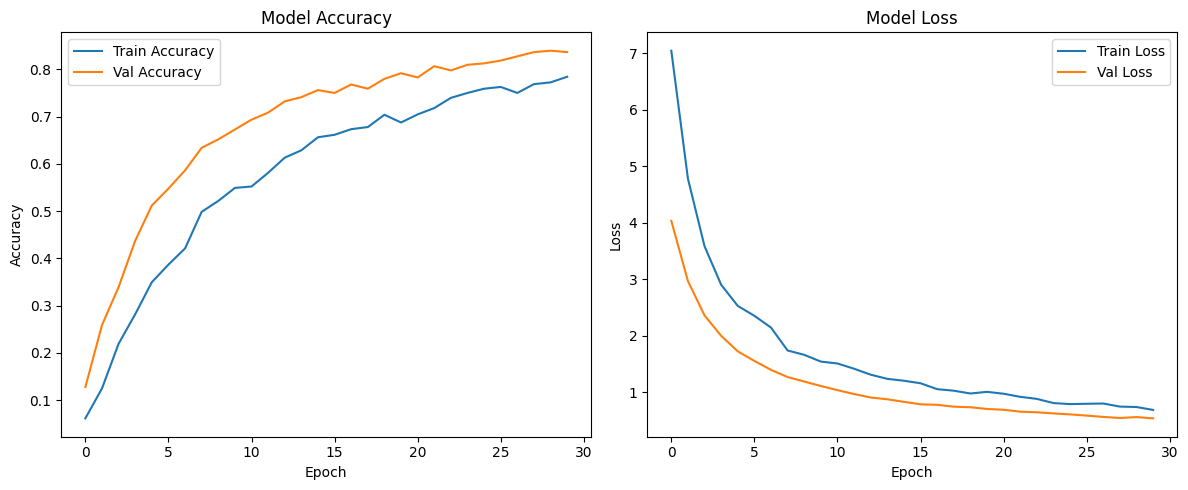

In [7]:
epochs = 30
lr = 1e-4
optimizer = 'Adam'
name = 'UC1_P2'
freeze_layers(model, verbose=1)
unfreeze_head(model, verbose=1)
train(model, epochs, lr, optimizer, name, is_binary=0, plot=True, augmentation_pipeline=data_augmentation, early_stopping=False)

In [8]:
model_evaluation_precise(model)

Found 420 files belonging to 21 classes.
Start evaluating batches
Batch Number: 13
Precise test accuracy: 0.84524
Precise test loss: 0.44294


(0.8452381, 0.44294238090515137)

In [9]:
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model = models.Sequential()
for layer in vgg_base.layers:
    model.add(layer)
# Adding the new head
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(21, activation='softmax'))

- block1_conv1 (Conv2D), Trainable: False
- block1_conv2 (Conv2D), Trainable: False
- block1_pool (MaxPooling2D), Trainable: False
- block2_conv1 (Conv2D), Trainable: False
- block2_conv2 (Conv2D), Trainable: False
- block2_pool (MaxPooling2D), Trainable: False
- block3_conv1 (Conv2D), Trainable: False
- block3_conv2 (Conv2D), Trainable: False
- block3_conv3 (Conv2D), Trainable: False
- block3_pool (MaxPooling2D), Trainable: False
- block4_conv1 (Conv2D), Trainable: False
- block4_conv2 (Conv2D), Trainable: False
- block4_conv3 (Conv2D), Trainable: False
- block4_pool (MaxPooling2D), Trainable: False
- block5_conv1 (Conv2D), Trainable: False
- block5_conv2 (Conv2D), Trainable: False
- block5_conv3 (Conv2D), Trainable: False
- block5_pool (MaxPooling2D), Trainable: False
- global_average_pooling2d_2 (GlobalAveragePooling2D), Trainable: False
- dense_4 (Dense), Trainable: False
- dropout_2 (Dropout), Trainable: False
- dense_5 (Dense), Trainable: False


- block1_conv1 (Conv2D), Trainabl

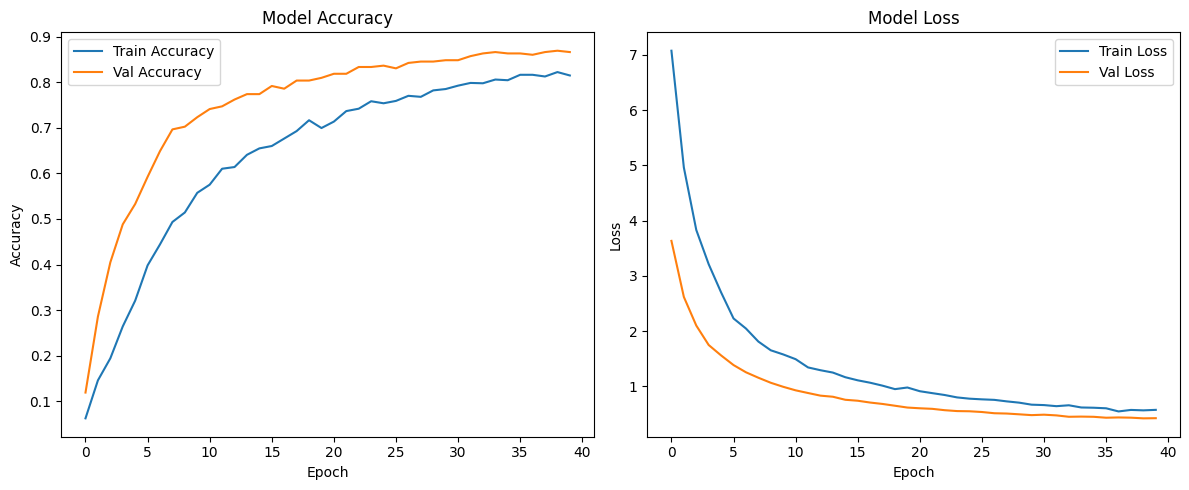

In [10]:
epochs = 40
# lr = 1e-5
optimizer = 'Adam'
name = 'UC1_P2'
freeze_layers(model, verbose=1)
unfreeze_head(model, verbose=1)
train(model, epochs, lr, optimizer, name, is_binary=0, plot=True, augmentation_pipeline=data_augmentation, early_stopping=False)

In [11]:
model_evaluation_precise(model)

Found 420 files belonging to 21 classes.
Start evaluating batches
Batch Number: 13
Precise test accuracy: 0.88571
Precise test loss: 0.33544


(0.8857143, 0.3354436763695308)